#### Randomized Block Design

##### Air Traffic Controller Stress Test

A study measuring the fatigue and stress of air traffic controllers resulted in proposals for modification and redesign of the controller's work station.

After consideration of several designs for workstation, three specific alternatives are selected as having the best potential for reducing controller stress.

The key question is: To what extent do the three alternatives differ in terms of their effect on controller stress?

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_excel('Data Files\RBD.xlsx')
df

,System A,System B,System C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [3]:
data = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['System A', 'System B', 'System C'])
data.columns = ['index', 'treatments', 'value']

In [4]:
model = ols('value ~ C(treatments)', data=data).fit()

In [5]:
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


In [6]:
# accept the null hypothesis since 0.068903 > 0.05

Solving RBD example using Python

In [7]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
df = pd.read_excel('Data Files\RBD.xlsx')
df

,System A,System B,System C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [9]:
data = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['System A', 'System B', 'System C'])
data.columns = ['blocks', 'treatments', 'value']

In [10]:
model = ols('value ~ C(blocks)+ C(treatments)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(blocks),5.0,30.0,6.0,3.157895,0.057399
C(treatments),2.0,21.0,10.5,5.526316,0.024181
Residual,10.0,19.0,1.9,NaN,NaN


In [11]:
# reject the null hypothesis

#### Problem 2: RBD

An experiment was performed to determine the effect of 4 different chemicals on the strength of a fabric.

These chemicals are used as part of the permanent press finishing process.

Five fabric samples were selected, and a randomized complete block design was run by testing each chemical type once in random order on each fabric sample.

The data is shown in Table.

We will test for differences in means using an ANOVA with alpha=0.01

In [12]:
df = pd.read_excel('Data Files\Rbd2.xlsx')
df

,chem1,chem2,chem3,chem4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [13]:
data = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['chem1', 'chem2', 'chem3', 'chem4'])
data.columns = ['index', 'treatments', 'value']

In [14]:
model = ols('value ~ C(treatments)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,18.044,6.014667,12.589569,0.000176
Residual,16.0,7.644,0.477750,NaN,NaN


RBD Method for problem 2

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('Data Files\Rbd2.xlsx')
df

,chem1,chem2,chem3,chem4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [17]:
data = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['chem1', 'chem2', 'chem3', 'chem4'])
data.columns = ['Fabric', 'Chemical', 'value']
data

,Fabric,Chemical,value
0,0,chem1,1.3
1,1,chem1,1.6
2,2,chem1,0.5
3,3,chem1,1.2
4,4,chem1,1.1
5,0,chem2,2.2
6,1,chem2,2.4
7,2,chem2,0.4
8,3,chem2,2.0
9,4,chem2,1.8


In [18]:
model = ols('value ~ C(Fabric) + C(Chemical)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Fabric),4.0,6.693,1.673250,21.113565,2.318913e-05
C(Chemical),3.0,18.044,6.014667,75.894848,4.518310e-08
Residual,12.0,0.951,0.079250,NaN,NaN


### Two Way ANOVA

In [19]:
df2 = pd.read_excel('Data Files\Twoway.xlsx')
df2

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience
5,400,three_hr,Artsandscience
6,460,One-day,Business
7,540,One-day,Business
8,560,One-day,Engineering
9,620,One-day,Engineering


In [20]:
formula = 'Value ~ C(college) + C(prep_pro) + C(college):C(prep_pro)'
model = ols(formula, df2).fit()

In [21]:
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(college),45300.0,2.0,10.269521,0.004757
C(prep_pro),6100.0,2.0,1.382872,0.299436
C(college):C(prep_pro),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN


### Linear Regression

In [22]:
data = pd.read_excel('Data Files\Reg2.xlsx')
data

,Hydrocarbon level,O2
0,0.99,90.01
1,1.02,89.05
2,1.15,91.43
3,1.29,93.74
4,1.46,96.73
5,1.36,94.45
6,0.87,87.59
7,1.23,91.77
8,1.55,99.42
9,1.40,93.65


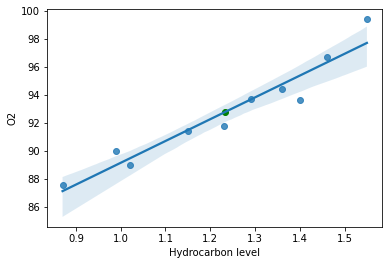

In [23]:
x = data['Hydrocarbon level']
y = data['O2']

plt.figure()
sns.regplot(x=x, y=y, fit_reg=True)
plt.scatter(np.mean(x), np.mean(y), color="green")

##### Simple Linear Regression

Example:

An auto company periodically has a special week-long sale.

As part of the advertising campaign runs one or more television commercials during the weekend preceding the sale.

Data from a sample of 5 previous sales are shown on the next slide.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm 
import matplotlib as mpl 
from sklearn.linear_model import LinearRegression
from scipy import stats

In [25]:
tb1 = pd.read_excel('Data Files\Regr.xlsx')

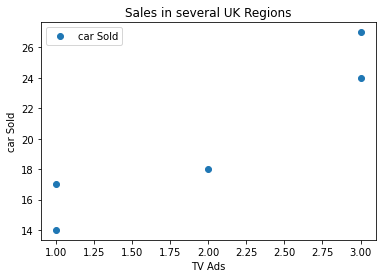

In [26]:
tb1.plot('TV Ads', 'car Sold', style='o')
plt.ylabel('car Sold')
plt.title('Sales in several UK Regions')
plt.show()

In [27]:
t = tb1['TV Ads']
c = tb1['car Sold']

In [28]:
import statsmodels.api as s 
t = s.add_constant(t)
model1 = s.OLS(c, t)
result1 = model1.fit()
result1.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Mon, 07 Mar 2022   Prob (F-statistic):             0.0190
Time:                        20:59:38   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.024       2.469      17.531
TV Ads         5.0000      1.080      4.629      0.019       1.563       8.437
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.214
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                           0.256   Prob(JB):                        0.714
Kurtosis:                       1.276   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Example Problem

The data in the file hardness.xls provide measurements on the hardness and the tensile strength for 35 specimens of die-cast aluminium.

It is believed that hardness(measured in Rockwell E units) can be used to predict tensile strength (measured in thousands of pounds per square inch)

a. Construct a scatter plot\
b. Assuming a linear relationship, use the least-squares method to find the regression coefficients b0 and b1\
c. Interpret the meaning of the slope b1, in this problem\
d. Predict the mean tensile strength for die-cast aluminium that has a hardness of 30 Rockwell E units\

In [29]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error

In [30]:
data = pd.read_excel('Data Files\HARDNESS.xlsx')
data

,Tensile strength,Hardness
0,53.0,29.31
1,70.2,34.86
2,84.3,36.82
3,55.3,30.12
4,78.5,34.02
5,63.5,30.82
6,71.4,35.40
7,53.4,31.26
8,82.5,32.18
9,67.3,33.42


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = data['Hardness'].values.reshape(-1, 1)
y = data['Tensile strength'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28, 1), (7, 1), (28, 1), (7, 1))

In [34]:
len(x_train)

28

In [35]:
len(x_test)

7

In [36]:
x_train

array([[38.02],
       [34.76],
       [32.18],
       [29.31],
       [23.69],
       [30.12],
       [27.65],
       [29.25],
       [35.4 ],
       [27.99],
       [28.67],
       [31.26],
       [34.02],
       [34.88],
       [29.25],
       [36.82],
       [34.47],
       [24.66],
       [28.71],
       [25.81],
       [34.86],
       [30.82],
       [25.77],
       [37.69],
       [26.46],
       [25.68],
       [31.85],
       [23.21]])

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [38]:
reg.fit(x_train, y_train)

LinearRegression()

In [39]:
reg.intercept_

array([7.045691])

In [40]:
reg.coef_

array([[1.99777401]])

In [41]:
y_predict = reg.predict(x_test)

In [42]:
y_predict

array([[73.81129842],
       [56.27084261],
       [64.28191639],
       [66.63928973],
       [70.37512713],
       [74.97000735],
       [71.73361345]])

Mean Squared Error = $SSE/(n-2)$

In [43]:
mean_squared_error(y_test, y_predict)

35.71053398209997

Score = $R^2$ = $SSR/SST$

In [44]:
reg.score(x_test, y_test)

0.5362243730094254

In [45]:
reg.score(x_train, y_train)

0.4500146647765303